In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [12]:
conda install -c menpo wget

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HP\anaconda

  added / updated specs:
    - wget


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wget-1.16.3                |                0         1.4 MB  menpo
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  wget               menpo/win-64::wget-1.16.3-0 




wget-1.16.3          | 1.4 MB    |            |   0% 
wget-1.16.3          | 1.4 MB    | ########## | 100% 
wget-1.16.3          | 1.4 MB    | ########## | 100% 
                                                     


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packag

In [13]:
import wget

In [19]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2023-03-05 13:46:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


In [61]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [62]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


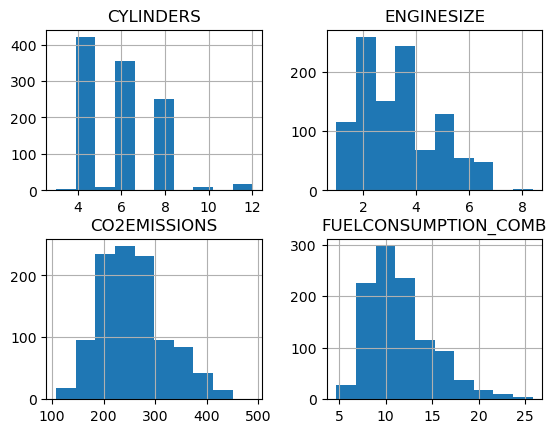

In [63]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

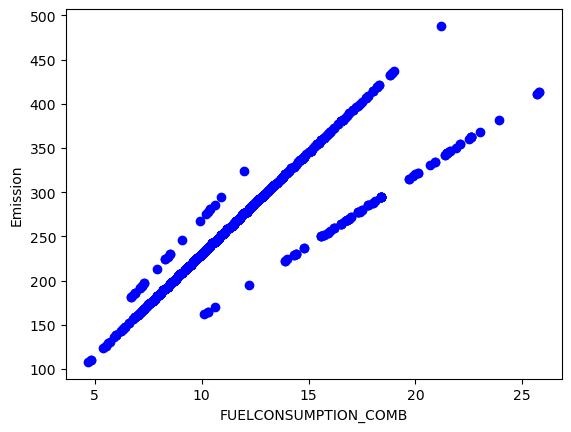

In [65]:
plt.scatter(x=cdf.FUELCONSUMPTION_COMB,y=cdf.CO2EMISSIONS,color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')
plt.show()

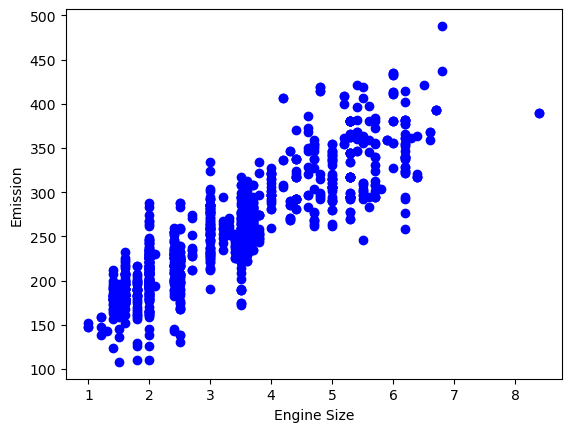

In [66]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

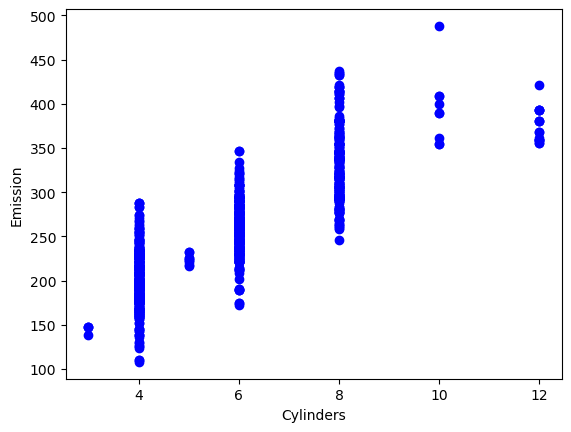

In [68]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()

In [69]:
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

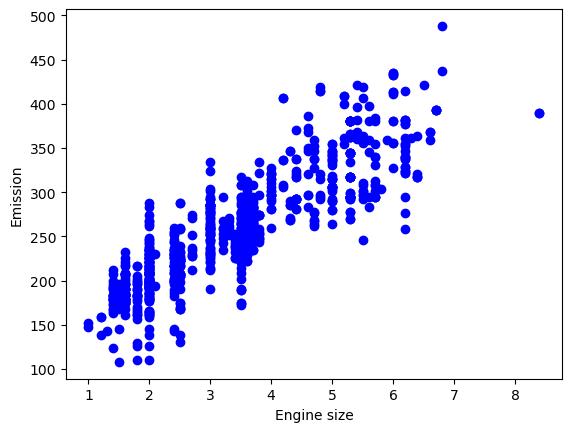

In [82]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [83]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.81113338]]
Intercept:  [126.41419978]


Text(0, 0.5, 'Emission')

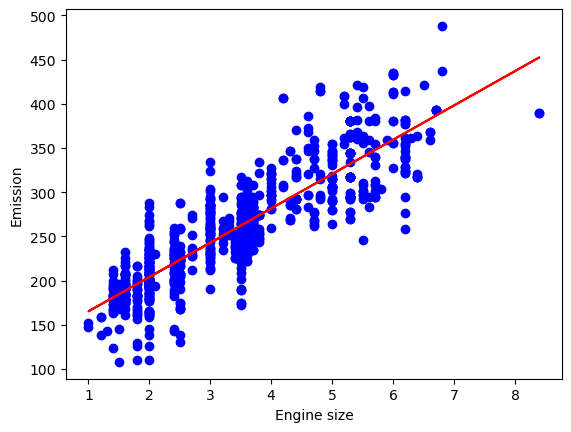

In [85]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,regr.coef_[0][0]*train_x+regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [86]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 19.58
Residual sum of squares (MSE): 645.57
R2-score: 0.82


In [88]:
train_x=train[['FUELCONSUMPTION_COMB']]
test_x=test[['FUELCONSUMPTION_COMB']]

In [89]:
regr=linear_model.LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

In [90]:
predictions=regr.predict(test_x)

In [92]:
mae=np.mean(np.absolute(test_y-predictions))
mae

17.94408947734523